<h1>Topic Modeling Pipeline</h1>

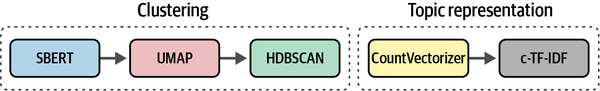

<h1>Clustering</h1>

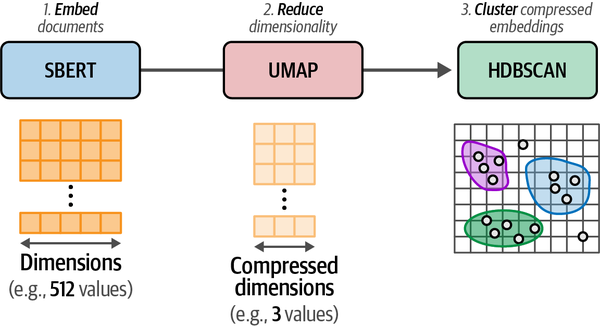

<h1> Embedding Documents</h1>

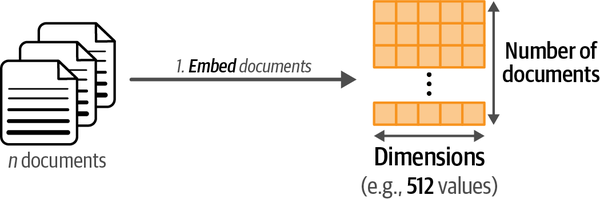

<ul>
    <li> Convert textual data to embeddings</li>
    <li> Embeddings are numerical representation of text (in order to capture meaning)</li>
</ul>

In [ ]:
from sentence_transformers import SentenceTransformer

# Create an embedding for each abstract
embedding_model = SentenceTransformer("thenlper/gte-small")
embeddings = embedding_model.encode(abstracts, show_progress_bar=True)

<h1>Reducing Dimensionality of Embeddings</h1>

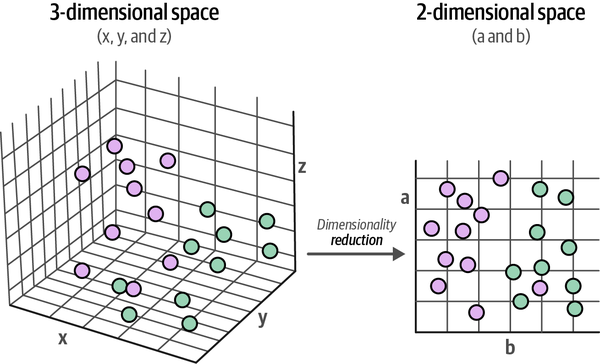

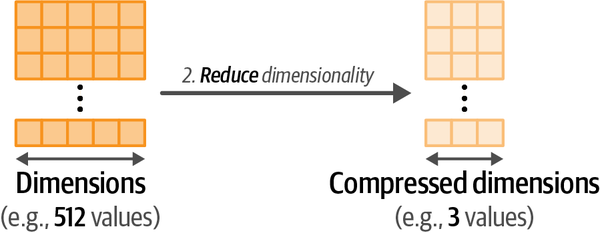

In [ ]:
from umap import UMAP

# We reduce the input embeddings from 384 dimensions to 5 dimensions
umap_model = UMAP(
    n_components=5, min_dist=0.0, metric='cosine', random_state=42
)
reduced_embeddings = umap_model.fit_transform(embeddings)

<h1>Cluster the Reduced Embeddings</h1>

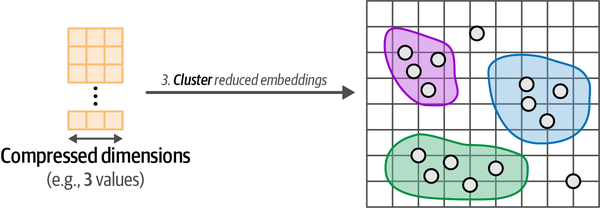

In [ ]:
from hdbscan import HDBSCAN

# We fit the model and extract the clusters
hdbscan_model = HDBSCAN(
    min_cluster_size=50, metric="euclidean", cluster_selection_method="eom"
).fit(reduced_embeddings)
clusters = hdbscan_model.labels_

<h1>Topic Representation</h1>

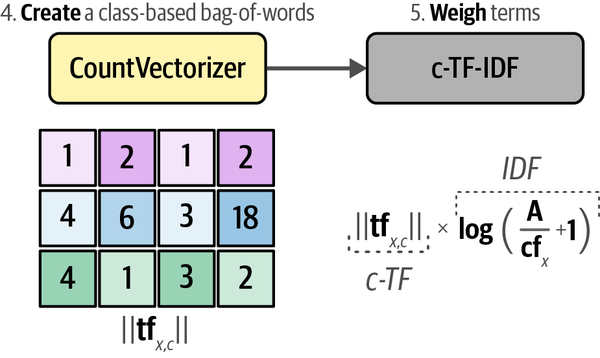

<h2>c-TF-IDF</h2>

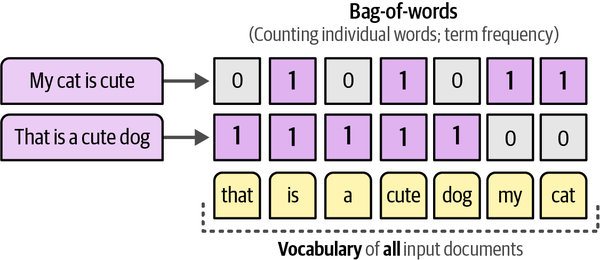

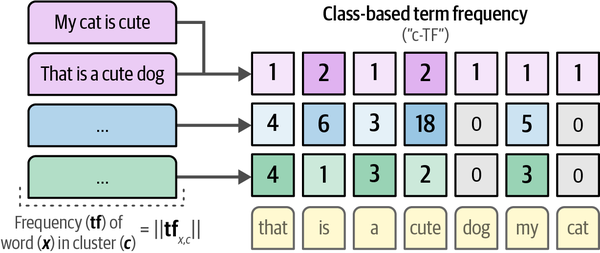

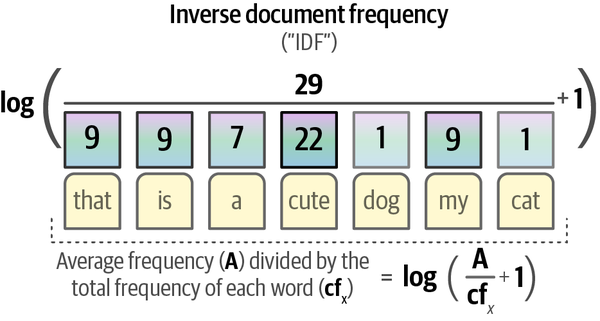